# Chapter 12 
 Machine Learning for Business Analytics<br>
Concepts, Techniques, and Applications in Python<br>
by Galit Shmueli, Peter C. Bruce, Peter Gedeck, Nitin R. Patel

Publisher: Wiley; 2nd edition (2024) <br>
<!-- ISBN-13: 978-3031075650 -->

(c) 2024 Galit Shmueli, Peter C. Bruce, Peter Gedeck, Nitin R. Patel

The code needs to be executed in sequence.

Python packages and Python itself change over time. This can cause warnings or errors.
"Warnings" are for information only and can usually be ignored.
"Errors" will stop execution and need to be fixed in order to get results.

If you come across an issue with the code, please follow these steps

- Check the repository (https://gedeck.github.io/sdsa-code-solutions/) to see if the code has been upgraded. This might solve the problem.
- Report the problem using the issue tracker at https://github.com/gedeck/sdsa-code-solutions/issues
- Paste the error message into Google and see if someone else already found a solution

In [2]:
import matplotlib.pyplot as plt
import mlba
import numpy as np
import pandas as pd
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
%matplotlib inline

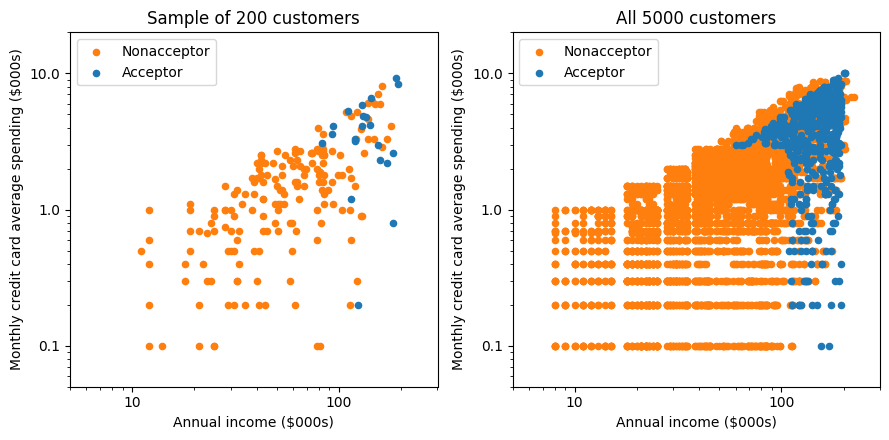

In [3]:
from matplotlib.ticker import ScalarFormatter, FormatStrFormatter

universal_df = mlba.load_data('UniversalBank.csv')

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=[9, 4.5])
plt.subplots_adjust(hspace=0.25)

def createGraph(df, title, ax):
    ccIdx = df[df['Personal Loan'] == 0].index
    df.loc[ccIdx].plot(x='Income', y='CCAvg', kind='scatter',
                            label='Nonacceptor', color='C1',
                            ylim = (0.05, 20), xlim = (5, 300),
                            logx=True, logy=True, ax=ax)
    df.drop(ccIdx).plot(x='Income', y='CCAvg', kind='scatter',
                            label='Acceptor', color='C0',
                            ylim = (0.05, 20), xlim = (5, 300),
                            logx=True, logy=True, ax=ax)
    ax.set_xlabel('Annual income ($000s)')
    ax.set_ylabel('Monthly credit card average spending ($000s)')
    ax.xaxis.set_major_formatter(ScalarFormatter())
    ax.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
    ax.set_title(title)
createGraph(universal_df.sample(200, random_state=10), 'Sample of 200 customers', axes[0])
createGraph(universal_df, 'All 5000 customers', axes[1])
plt.tight_layout()
plt.show()

In [4]:
mower_df = mlba.load_data('RidingMowers.csv')
predictors = ['Income', 'Lot_Size']
outcome = 'Ownership'

da_reg = LinearDiscriminantAnalysis()
da_reg.fit(mower_df[predictors], mower_df[outcome])

print('Coefficients', da_reg.coef_)
print('Intercept', da_reg.intercept_)

Coefficients [[0.1002303  0.78518471]]
Intercept [-21.73876167]


In [5]:
da_reg = LinearDiscriminantAnalysis()
da_reg.fit(mower_df[predictors], mower_df[outcome])

result_df = mower_df.copy()
result_df['Dec. Score'] = da_reg.decision_function(mower_df[predictors])
result_df['Prediction'] = da_reg.predict(mower_df[predictors])
result_df['p(Owner)'] = da_reg.predict_proba(mower_df[predictors])[:, 1]
result_df

,Income,Lot_Size,Ownership,Dec. Score,Prediction,p(Owner)
0,60.0,18.4,Owner,-1.277545,Nonowner,0.217968
1,85.5,16.8,Owner,0.022032,Owner,0.505508
2,64.8,21.6,Owner,1.716152,Owner,0.847632
3,61.5,20.8,Owner,0.757244,Owner,0.680755
4,87.0,23.6,Owner,5.511634,Owner,0.995977
5,110.1,19.2,Owner,4.372141,Owner,0.987533
6,108.0,17.6,Owner,2.905362,Owner,0.948111
7,82.8,22.4,Owner,4.148445,Owner,0.984456
8,69.0,20.0,Owner,0.880823,Owner,0.706993
9,93.0,20.8,Owner,3.914499,Owner,0.980440


In [6]:
c_income = da_reg.coef_[0, 0]
c_lotSize = da_reg.coef_[0, 1]
intercept = da_reg.intercept_[0]
print('Coefficients', da_reg.coef_)
print('Intercept', da_reg.intercept_)

print('Decision function')
print(f' = {c_income:.2f}*Income + {c_lotSize:.2f}*Lot_Size + {intercept:.2f}')

print('\nExample Income=$60K Lot_Size=18.4Kft2')
prediction = da_reg.decision_function(pd.DataFrame({'Income': 60, 'Lot_Size': 18.4}, index=['new']))[0]
print(f'  {c_income:.2f}*60 + {c_lotSize:.2f}*18.4 + {intercept:.2f} = {prediction:.2f}')
print('  negative => nonowner')

Coefficients [[0.1002303  0.78518471]]
Intercept [-21.73876167]
Decision function
 = 0.10*Income + 0.79*Lot_Size + -21.74

Example Income=$60K Lot_Size=18.4Kft2
  0.10*60 + 0.79*18.4 + -21.74 = -1.28
  negative => nonowner


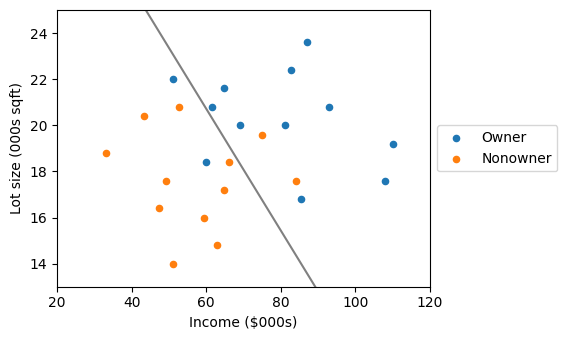

In [7]:
fig, ax = plt.subplots(figsize=(5, 3.5))
x_adhoc = np.array([40, 93])
y_adhoc = np.array([26, 12])
ax.plot(x_adhoc, y_adhoc, '-', color='grey') #, label='Ad hoc line')

mower_df[mower_df.Ownership=='Owner'].plot.scatter(x='Income', y='Lot_Size', c='C0', label='Owner', ax=ax)
mower_df[mower_df.Ownership!='Owner'].plot.scatter(x='Income', y='Lot_Size', c='C1', label='Nonowner', ax=ax)

ax.set_xlabel('Income ($000s)')
ax.set_ylabel('Lot size (000s sqft)')
ax.set_xlim(20, 120)
ax.set_ylim(13, 25)

box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()
plt.show()

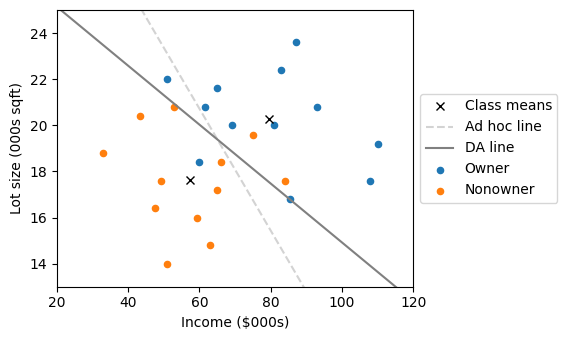

In [8]:
fig, ax = plt.subplots(figsize=(5, 3.5))
ax.plot(da_reg.means_[:,0], da_reg.means_[:,1], 'x', color='black', label='Class means', markersize=6)
ax.set_xlim(20, 120)
ax.set_ylim(13, 25)

ax.plot(x_adhoc, y_adhoc, '--', color='lightgrey', label='Ad hoc line')
x_lda = np.array(ax.get_xlim())
y_lda = (- intercept - c_income * x_lda) / c_lotSize
ax.plot(x_lda, y_lda, '-', color='grey', label='DA line')
mower_df[mower_df.Ownership=='Owner'].plot.scatter(x='Income', y='Lot_Size', c='C0', label='Owner', ax=ax)
mower_df[mower_df.Ownership!='Owner'].plot.scatter(x='Income', y='Lot_Size', c='C1', label='Nonowner', ax=ax)

ax.set_xlabel('Income ($000s)')
ax.set_ylabel('Lot size (000s sqft)')

box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()
plt.show()

 Prior probabilities

In [9]:
X = mower_df[predictors]
y = mower_df[outcome]
da_reg_prior = LinearDiscriminantAnalysis(priors=[0.85,0.15])
da_reg_prior.fit(X, y)

family_13 = mower_df.loc[[12], predictors]
print('equal prior:', da_reg.predict(family_13)[0])
print('modified prior:', da_reg_prior.predict(family_13)[0])

equal prior: Owner
modified prior: Nonowner


 
   We can visualize the change in the decision boundary when the priors are taken into account.

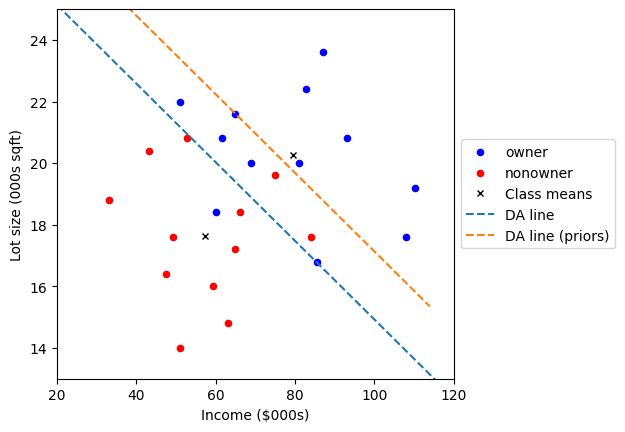

In [10]:
c_income_prior = da_reg_prior.coef_[0, 0]
c_lotSize_prior = da_reg_prior.coef_[0, 1]
intercept_prior = da_reg_prior.intercept_[0]


ax = mower_df[mower_df.Ownership=='Owner'].plot.scatter(x='Income', y='Lot_Size', c='blue', label='owner')
mower_df[mower_df.Ownership!='Owner'].plot.scatter(x='Income', y='Lot_Size', c='red', label='nonowner', ax=ax)

ax.plot(da_reg.means_[:,0], da_reg.means_[:,1], 'x', color='black', label='Class means', markersize=5)

# Determine the class separation line for the model with priors:
# The coefficients and intercept are extracted from the model that was trained
# with priors and therefore require no correction for the distortion
x_lda_prior = np.array(ax.get_xlim())
y_lda_prior = (- intercept_prior - c_income_prior * x_lda_prior) / c_lotSize_prior

ax.plot(x_lda, y_lda, '--', label='DA line')
ax.plot(x_lda_prior, y_lda_prior, '--', label='DA line (priors)')
ax.set_xlabel('Income ($000s)')
ax.set_ylabel('Lot size (000s sqft)')
ax.set_xlim(20, 120)
ax.set_ylim(13, 25)

box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

In [11]:
accidents_df = mlba.load_data('accidents.csv')
outcome = 'MAX_SEV'
predictors = [c for c in accidents_df.columns if c != outcome]

lda_reg = LinearDiscriminantAnalysis()
lda_reg.fit(accidents_df[predictors], accidents_df[outcome])

print('Coefficients and intercept')
fct = pd.concat([
    pd.DataFrame([lda_reg.intercept_], columns=lda_reg.classes_, index=['constant']),
    pd.DataFrame(lda_reg.coef_.transpose(), columns=lda_reg.classes_, index=predictors),
])
print(fct)
print()
mlba.classificationSummary(y_true=accidents_df[outcome],
                            y_pred=lda_reg.predict(accidents_df[predictors]))

Coefficients and intercept
                    fatal  no-injury  non-fatal
constant        -1.972659  -0.891172  -0.610471
RushHour        -0.996411   0.033430  -0.015774
WRK_ZONE        -0.457188   0.220012  -0.204480
WKDY            -1.471777   0.165707  -0.135404
INT_HWY          0.755344  -0.075816   0.060599
LGTCON_day       0.009515  -0.031421   0.030124
LEVEL            0.976626  -0.082717   0.063598
SPD_LIM          0.048033   0.004381  -0.005014
SUR_COND_dry    -5.999809  -0.164874   0.257895
TRAF_two_way     0.752985  -0.012844  -0.000048
WEATHER_adverse -6.596690   0.079166   0.032564

Confusion Matrix (Accuracy 0.5283)

          Prediction
   Actual     fatal no-injury non-fatal
    fatal         1         1         3
no-injury         6       114       172
non-fatal         6        95       202


In [12]:
result = pd.concat([
    pd.DataFrame({'Classification': lda_reg.predict(accidents_df.drop(columns=['MAX_SEV'])),
                  'Actual': accidents_df['MAX_SEV']}),
    pd.DataFrame(lda_reg.decision_function(accidents_df.drop(columns=['MAX_SEV'])),
                 columns=[f'Score {cls}' for cls in lda_reg.classes_]),
    pd.DataFrame(lda_reg.predict_proba(accidents_df.drop(columns=['MAX_SEV'])),
                 columns=[f'Propensity {cls}' for cls in lda_reg.classes_]),
], axis=1)

pd.set_option('display.precision',2)
pd.set_option('chop_threshold', .01)
print(result.head())

  Classification     Actual  Score fatal  Score no-injury  Score non-fatal  \
0      no-injury  no-injury        -5.94            -0.46            -0.96   
1      no-injury  non-fatal        -1.05            -0.46            -1.04   
2      no-injury  no-injury        -7.88            -0.63            -0.77   
3      no-injury  no-injury        -8.38            -0.54            -0.84   
4      no-injury  non-fatal        -9.84            -0.50            -0.85   

   Propensity fatal  Propensity no-injury  Propensity non-fatal  
0          0.00e+00                  0.62                  0.38  
1          2.63e-01                  0.47                  0.27  
2          0.00e+00                  0.54                  0.46  
3          0.00e+00                  0.57                  0.43  
4          0.00e+00                  0.59                  0.41  
